### Import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style("darkgrid")

### Import Dataset

In [2]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

### Create random noise matrix and final data matrix

In [3]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']

### Create Models

In [4]:
boston_lr = LinearRegression()
boston_ls = Lasso()
boston_rg = Ridge()
boston_en = ElasticNet()
models = [(boston_lr, 'Linear Regression'),
           (boston_ls, 'Lasso'),
           (boston_rg, "Ridge Regression"),
           (boston_en, "Elastic Net")]

### Scale data

In [12]:
boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

### Fit models and graph coefficients

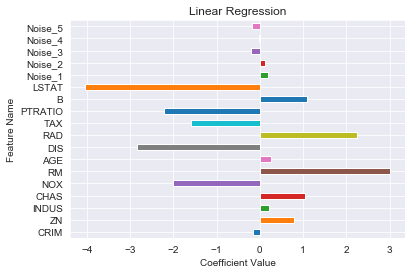

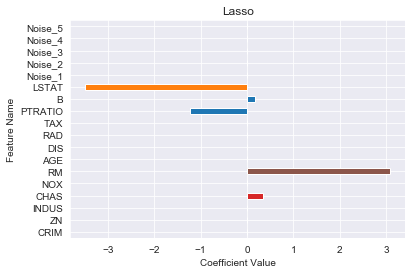

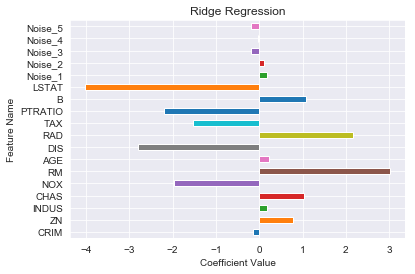

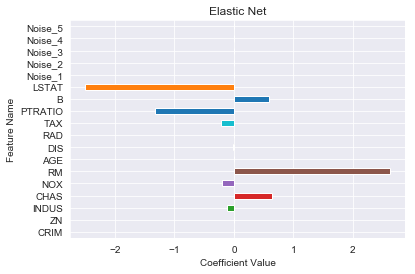

In [13]:
for model in models:
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()
    

### Get model scores

In [14]:
for model in models:
    mse = mean_squared_error(model[0].predict(X_test), y_test)
    print(f"Mean Squared Error of {model[1]}: {mse:.2f}")

Mean Squared Error of Linear Regression: 23.87
Mean Squared Error of Lasso: 24.91
Mean Squared Error of Ridge Regression: 23.87
Mean Squared Error of Elastic Net: 24.63
